In [1]:
"""
Rhode Schwarz (BatMaus) Demo
Author: Andrei V.
"""

# from slab import *
# from slab.datamanagement import SlabFile
import numpy as np
import os
import datetime
import os.path
from importlib import reload
import matplotlib.pyplot as plt
%matplotlib notebook

import RhodeSchwarz
reload(RhodeSchwarz)

from RhodeSchwarz import RhodeSchwarz
from RhodeSchwarz import ZVB8


C:\ProgramData\Anaconda3\envs\py36vis\lib\site-packages\IPython\qt.py:13: ShimWarning: The `IPython.qt` package has been deprecated since IPython 4.0. You should import from qtconsole instead.
  "You should import from qtconsole instead.", ShimWarning)


Could not load InstrumentManagerWindow
Could not load labbrick
Could not load Autonics TM4 Driver
Could not load Oxford Trition driver


In [2]:
# rs = RhodeSchwarz(address='192.168.14.190')
rs = ZVB8(address='192.168.14.231', reset = True)

In [3]:
rs.get_id()

I'm Bat Mouse!


'Rohde-Schwarz,ZNB8-4Port,1311601044101437,3.20\n'

# Q0

## Find readout

In [4]:
trans_settings = rs.trans_default_settings()
trans_settings['start_freq'] = 6.166976e9-2.5e6
trans_settings['stop_freq'] = 6.166976e9+2.5e6
trans_settings['avg_time'] = 10
trans_settings['ifBW'] = 500
trans_settings['RFpower'] = -25
trans_settings['freq_points'] = 2001
trans_settings

{'channel': 1,
 'avg_time': 10,
 'measurement': 'S21',
 'start_freq': 6164476000.0,
 'stop_freq': 6169476000.0,
 'freq_points': 2001,
 'RFpower': -25,
 'ifBW': 500,
 'mode': 'MOV'}

In [5]:
data = rs.trans_meas(trans_settings)

TypeError: sequence item 0: expected a bytes-like object, int found

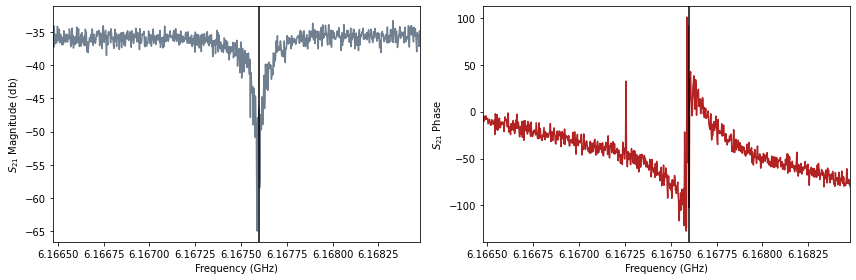

In [15]:
span = 6.166976 + np.array([-0.5,1.5])*1e-3
marker = 6.1676 

fig, ax = plt.subplots(1,2,figsize=(12, 4));

ax1 = ax[0]
ax1.plot(data['freq']/1e9,data['mag'], color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Magnitude (db)');
ax1.set_xlim(span)
ax1.axvline(marker , color = 'k')

ax1 = ax[1]
ax1.plot(data['freq']/1e9,data['phase'], color = 'firebrick')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Phase');
ax1.set_xlim(span)
ax1.axvline(marker , color = 'k')

plt.tight_layout()

## Qubit low power -5dbm

In [39]:
rs.reset()

spec_settings = rs.spec_default_settings()
spec_settings['CAVport'] = 1
spec_settings['RFport'] = 3
spec_settings['Mport'] = 2

spec_settings['start_freq'] = 5.25e9 - 350e6
spec_settings['stop_freq'] = 5.25e9 + 50e6
spec_settings['RFpower'] = -5
spec_settings['CAVfreq'] = 6.1676e9
spec_settings['CAVpower'] = -25
spec_settings['avg_time'] = 30
spec_settings['ifBW'] = 500
trans_settings['freq_points'] = 1001
spec_settings['measurement'] = 'S21'

spec_settings

{'channel': 1,
 'avg_time': 30,
 'measurement': 'S21',
 'start_freq': 4900000000.0,
 'stop_freq': 5300000000.0,
 'freq_points': 1001,
 'RFpower': -5,
 'RFport': 3,
 'Mport': 2,
 'CAVport': 1,
 'CAVpower': -25,
 'CAVfreq': 6167600000.0,
 'ifBW': 1000,
 'mode': 'MOV'}

In [40]:
data = []
data = rs.spec_meas(spec_settings)

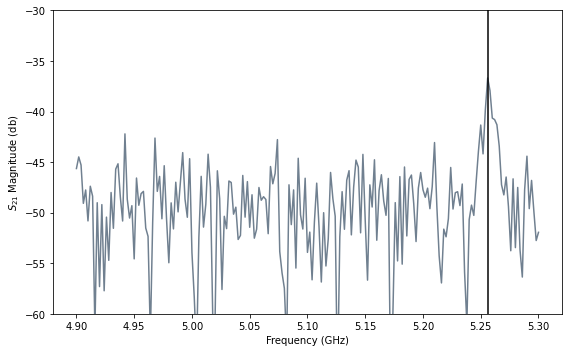

In [48]:
span = 6.166976 + np.array([-1,2])*1e-3
marker = 5.256

fig, ax = plt.subplots(figsize=(8, 5));

ax1 = ax
ax1.plot(data['freq']/1e9, data['mag'], color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Magnitude (db)');
# ax1.set_xlim(span)
ax1.set_ylim([-60,-30])
ax1.axvline(marker , color = 'k')


plt.tight_layout()

## Qubit high power 10dbm

In [69]:
rs.reset()

spec_settings = rs.spec_default_settings()
spec_settings['CAVport'] = 1
spec_settings['RFport'] = 3
spec_settings['Mport'] = 2

spec_settings['start_freq'] = 5.25e9 - 350e6
spec_settings['stop_freq'] = 5.25e9 + 50e6
spec_settings['RFpower'] = 10
spec_settings['CAVfreq'] = 6.1676e9
spec_settings['CAVpower'] = -25
spec_settings['avg_time'] = 10
spec_settings['ifBW'] = 500
trans_settings['freq_points'] = 11
spec_settings['measurement'] = 'S21'

spec_settings

{'channel': 1,
 'avg_time': 10,
 'measurement': 'S21',
 'start_freq': 4900000000.0,
 'stop_freq': 5300000000.0,
 'freq_points': 1001,
 'RFpower': 10,
 'RFport': 3,
 'Mport': 2,
 'CAVport': 1,
 'CAVpower': -25,
 'CAVfreq': 6167600000.0,
 'ifBW': 500,
 'mode': 'MOV'}

In [68]:
data = []
data = rs.spec_meas(spec_settings)

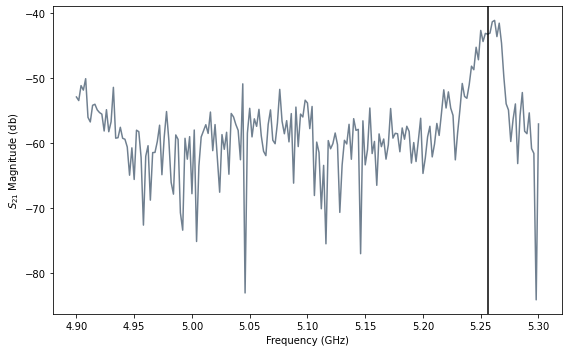

In [61]:
span = 6.166976 + np.array([-1,2])*1e-3
marker = 5.256

fig, ax = plt.subplots(figsize=(8, 5));

ax1 = ax
ax1.plot(data['freq']/1e9, data['mag'], color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Magnitude (db)');
# ax1.set_xlim(span)
# ax1.set_ylim([-60,-30])
ax1.axvline(marker , color = 'k')


plt.tight_layout()

# Replicate by-hand measurements using this code